In [24]:
"""
卷积神经网络的pytorch实践代码

"""

'part 1:build a module'


from torch import nn, optim

#设定超参数
INPUT_SIZE=3200
HIDDEN_SIZE=256
NUM_CLASSES=10
EPOCHS=5
BATCH_SIZE=64
LEARNING_RATE=1e-3


class CNN(nn.Module):
    '''
    custom CNN
    '''
    
    def __init__(self,input_size,hidden_size,num_classes):
        super(CNN,self).__init__()
        
        self.conv_1=nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3)
        
        self.conv_2=nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3)
        
        self.cov_3=nn.Conv2d(in_channels=64,out_channels=128,kernel_size=2,padding=1)
        
        self.relu=nn.ReLU()
        
        self.max_pool=nn.MaxPool2d(kernel_size=2,stride=2)
        
         #多维数据的降维函数
        self.flatten=nn.Flatten()
        
        self.l1=nn.Linear(input_size, hidden_size)
        
        self.l2=nn.Linear(hidden_size, num_classes)
        
        
    def forward(self,x):
        
        out=self.conv_1(x)
        out=self.relu(out)
        out=self.max_pool(out)
        
        out=self.conv_2(out)
        out=self.relu(out)
        out=self.max_pool(out)
        
        out=self.conv_3(out)
        out=self.relu(out)
        out=self.max_pool(out)
        
        out=self.flatten(out)
        
        out=self.l1(out)
        out=self.relu(out)
        out=self.l2(out)
        
        return out
    
#init model    
model=CNN(INPUT_SIZE,HIDDEN_SIZE,NUM_CLASSES)

#init criterion
criterion=nn.CrossEntropyLoss()

#init optim
optimizer=optim.Adam(model.parameters(), lr=LEARNING_RATE)
        

In [25]:

'part 2:reading data'


#reading data
import pandas as pd

train_data=pd.read_csv('')
test_data=pd.read_csv('')

X_train=train_data[train_data.columns[1:]]
Y_train=train_data['label']

X_test=test_data[test_data.columns[1:]]
Y_test=test_data['label']


In [26]:
'part 3:preprocessing data'


from sklearn.preprocessing import StandardScaler


#init SS
ss=StandardScaler()

#standard data
X_train=ss.fit_transform(X_train)

#standard label
X_test=ss.transform(X_test)


In [27]:
'part 3:training data'


import torch 
from torch.utils.data import TensorDataset, DataLoader


#create a data structure which fit torch
train_tensor=TensorDataset(torch.tensor(X_train.astype('float32')),
                           torch.tensor(Y_train.values))

#create a data reading way 
train_loader=DataLoader(train_tensor, batch_size=BATCH_SIZE,shuffle=True)

n_total_steps=len(train_loader)


#start training
model.train()


for epoch in range(EPOCHS):
    for i,(features,labels) in enumerate(train_loader):
        images=features.reshape([-1,1,28,28])
        outputs=model(images)
        loss=criterion(outputs, labels)
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(i+1)%300==0:
            print(f'Epoch[{epoch+1}/{EPOCHS}],Step[{i+1}/{n_total_steps}],Loss:{loss.item():.4f}')
    


Epoch[1/5],Step[300/938],Loss:0.6327
Epoch[1/5],Step[600/938],Loss:0.1956
Epoch[1/5],Step[900/938],Loss:0.2434
Epoch[2/5],Step[300/938],Loss:0.2541
Epoch[2/5],Step[600/938],Loss:0.1374
Epoch[2/5],Step[900/938],Loss:0.1461
Epoch[3/5],Step[300/938],Loss:0.3722
Epoch[3/5],Step[600/938],Loss:0.1735
Epoch[3/5],Step[900/938],Loss:0.2618
Epoch[4/5],Step[300/938],Loss:0.3861
Epoch[4/5],Step[600/938],Loss:0.1013
Epoch[4/5],Step[900/938],Loss:0.1977
Epoch[5/5],Step[300/938],Loss:0.1009
Epoch[5/5],Step[600/938],Loss:0.1182
Epoch[5/5],Step[900/938],Loss:0.1477


In [28]:
#构建适用于PyTorch模型测试的数据结构。
test_tensor = TensorDataset(torch.tensor(X_test.astype('float32')), torch.tensor(Y_test.values))

#构建适用于PyTorch模型测试的数据读取器。
test_loader = DataLoader(dataset = test_tensor, batch_size = BATCH_SIZE, shuffle = False)

#开启模型测试。
model.eval()

n_correct = 0
n_samples = 0

for features, labels in test_loader:
    images = features.reshape([-1, 1, 28, 28])
    outputs = model(images)
    _, predictions = torch.max(outputs.data, 1)
    
    n_samples += labels.size(0)
    n_correct += (predictions == labels).sum().item() 

acc = 100.0 * n_correct / n_samples
print('卷积神经网络（PyTorch版本）在fashion_mnist测试集上的准确率为: %.2f%%。' %acc) 

卷积神经网络（PyTorch版本）在fashion_mnist测试集上的准确率为: 90.56%。


In [1]:
import numpy as np

x = np.array([5, 10, 15, 20, 25])
y = np.array([3, 6, 9, 12, 15 ])

log_x = np.log(x)
log_y = np.log(y)

coefficients = np.polyfit(log_x, y, 1)
print(coefficients)

[ 7.2647162  -9.64806344]


In [5]:
import numpy as np
np.random.rand(1)

In [5]:
import pandas as pd
all = pd.read_excel('/Users/shenfeiyang/Documents/GitHub/mathematical-modeling/data/B_data.xlsx',sheet_name=None)
all.keys()

dict_keys(['二元1', '二元2', '多元1', '多元2'])

In [7]:
all['二元1'].info

<bound method DataFrame.info of     0  0.1  0.2  1  0.3  1.1
0   1    1    1  0    1    0
1   1    0    0  1    0    0
2   1    0    1  1    1    0
3   1    1    1  0    1    1
4   1    0    0  0    0    1
.. ..  ...  ... ..  ...  ...
74  0    1    0  1    1    1
75  0    1    1  0    1    0
76  1    1    1  1    0    0
77  1    1    0  0    0    1
78  1    0    0  0    0    0

[79 rows x 6 columns]>

In [1]:
from sklearn import svm
predictor = svm.SVC(gamma='scale', C=1.0, decision_function_shape='ovr', kernel='rbf')

/opt/anaconda3/envs/torch_nightly_env/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import numpy as np
a = np.linspace(-1,2,5)
print(a)

[-1.   -0.25  0.5   1.25  2.  ]


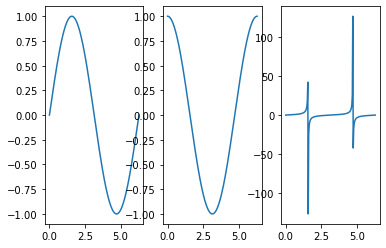

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,2*np.pi,200)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
ax1 = plt.subplot(1,3,1)
ax1.plot(x, y1)
ax2 = plt.subplot(1,3,2)
ax2.plot(x, y2)
ax3 = plt.subplot(1,3,3)
ax3.plot(x, y3)
plt.show()